In [10]:
import numpy as np
import pandas as pd
import nltk #natural lang toolkit
nltk.download('punkt') #Punkt Sentence Tokenizer. This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm
import re #RegEx Module. Python has a built-in package called re , which can be used to work with Regular Expressions.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sukai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
df = pd.read_csv("tennis_articles_v4.csv")

In [12]:
df.head() #show 5 starting rows of csv file

,article_id,article_text,source
0,1,Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,"BASEL, Switzerland (AP), Roger Federer advance...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...


In [13]:
df['article_text'][4] #showing article no 5

'Federer, 37, first broke through on tour over two decades ago and he has since gone on to enjoy a glittering career. The 20-time Grand Slam winner is chasing his 99th ATP title at the Swiss Indoors this week and he faces Jan-Lennard Struff in the second round on Thursday (6pm BST). Davenport enjoyed most of her success in the late 1990s and her third and final major tournament win came at the 2000 Australian Open. But she claims the mentality of professional tennis players slowly began to change after the new millennium. "It seems pretty friendly right now," said Davenport. "I think there is a really nice environment and a great atmosphere, especially between some of the veteran players helping some of the younger players out. "It\'s a very pleasant atmosphere, I\'d have to say, around the locker rooms. "I felt like the best weeks that I had to get to know players when I was playing were the Fed Cup weeks or the Olympic weeks, not necessarily during the tournaments. "And even though m

In [14]:
#breaking text into individual sentences
from nltk.tokenize import sent_tokenize
sentences = []
for s in df['article_text']:
    sentences.append(sent_tokenize(s))
    
sentences = [y for x in sentences for y in x] #flatten list

In [15]:
sentences[:5]

['Maria Sharapova has basically no friends as tennis players on the WTA Tour.',
 "The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.",
 'I think everyone knows this is my job here.',
 "When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.",
 "I'm a pretty competitive girl."]

# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    #print(values[0])
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    #print(coefs)
    word_embeddings[word] = coefs
f.close()

word_embeddings.keys()
#values[0]
#len(word_embeddings)
#word_embeddings['small'] #We now have word vectors for 400,000 different terms stored in the dictionary – ‘word_embeddings’.

In [16]:
#Text Preprocessing/Cleaning
#remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]


In [17]:
clean_sentences[3:9]

['when i m on the courts or when i m on the court playing  i m a competitor and i want to beat every single person whether they re in the locker room or across the net so i m not the one to strike up a conversation about the weather and know that in the next few minutes i have to go and try to win a tennis match ',
 'i m a pretty competitive girl ',
 'i say my hellos  but i m not sending any players flowers as well ',
 'uhm  i m not really friendly or close to many players ',
 'i have not a lot of friends away from the courts  ',
 'when she said she is not really close to a lot of players  is that something strategic that she is doing ']

In [18]:
clean_sentences[10:15]

[' no  not at all ',
 'i think just because you re in the same sport doesn t mean that you have to be friends with everyone just because you re categorized  you re a tennis player  so you re going to get along with tennis players ',
 'i think every person has different interests ',
 'i have friends that have completely different jobs and interests  and i ve met them in very different parts of my life ',
 'i think everyone just thinks because we re tennis players we should be the greatest of friends ']

In [19]:
nltk.download('stopwords') #Get rid of the stopwords (commonly used words of a language – is, am, the, of, in, etc.) present in the sentences.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sukai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(len(stop_words))
stop_words[:9]

179


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you']

In [21]:
 #define a function to remove these stopwords from our dataset
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [22]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [23]:
clean_sentences[50:60] #clean from punctuations and stopwords

['second seeded anderson defeated fernando verdasco',
 'anderson shot fifth career title second year winning new york february',
 'nishikori leads anderson career matchups south african previous meeting year',
 'victory sunday anderson qualify atp finals',
 'currently ninth place nishikori win could move within points cut eight man event london next month',
 'nishikori held serve throughout kukushkin came qualifying',
 'used first break point close first set going second wrapping win first match point',
 'verdasco anderson hit nine aces opening set',
 'spaniard broke anderson twice second get another chance south african serve final set',
 'federer first broke tour two decades ago since gone enjoy glittering career']

In [24]:
#Vector Representation of Sentences
#use clean_sentences to create vectors for sentences in our data with the help of the GloVe word vectors

#Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs 
f.close()

In [25]:
print('length of word_embeddings is',len(word_embeddings),'words')
print('For Example:')
print('The word "maria" has 1D array of 100 values: ')
word_embeddings['maria']

length of word_embeddings is 400000 words
For Example:
The word "maria" has 1D array of 100 values: 


array([ 0.089831 , -0.48885  , -0.43325  ,  0.40843  , -0.31087  ,
       -0.028368 ,  0.23481  ,  0.59285  ,  0.14395  , -0.031488 ,
        0.59812  ,  0.60423  , -1.0204   ,  0.94414  , -0.20685  ,
       -0.71604  ,  0.35925  ,  0.54906  , -0.81433  ,  0.85464  ,
       -0.77     ,  0.17722  ,  0.46829  ,  2.1848   , -0.30356  ,
       -0.14618  , -0.031721 , -1.237    ,  0.99722  ,  0.6067   ,
       -0.14535  , -0.31622  ,  1.0659   ,  0.17084  ,  0.572    ,
       -0.26004  ,  0.28351  , -0.05624  ,  0.51423  ,  0.24415  ,
       -0.22479  , -0.42128  ,  0.5311   ,  0.01898  ,  0.51962  ,
       -0.95861  , -0.29593  , -0.59059  ,  0.11893  ,  1.4661   ,
       -0.037916 ,  0.32234  ,  0.271    ,  0.39239  , -0.12836  ,
       -2.3792   , -0.67754  ,  0.79619  , -0.33012  ,  0.15114  ,
        0.09709  ,  0.56912  ,  0.078851 ,  0.0039787, -0.53211  ,
       -0.20123  ,  0.29722  ,  0.44458  ,  0.65177  , -0.23854  ,
        0.48704  ,  0.40112  ,  0.007153 , -0.38124  ,  0.4379

#create vectors for our sentences. 
#total 119 sentences
sentence_vectors = []
#n=1
for i in clean_sentences:
    #print("i is:")
    #print(n)
    #n=n+1
    #print(i)
    #print(len(i))
    if len(i) != 0:
        #if(n==9):
            #print(i.split())
            #print(len(i.split()))
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
            #print(v)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)


In [26]:
#create vectors for our sentences. 
#total 119 sentences
sentence_vectors = []
for i in clean_sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)

In [27]:
print('Length of "sentence_vectors" is',len(sentence_vectors)) #119 sentences
print('At every index of "sentence_vectors" there are total',len(sentence_vectors[7]),'elements') #at every index of this list, 100 values are residing
print('For Example:')
print('For sentence "',clean_sentences[7],'" , The vector will be: ') 
print(sentence_vectors[7]) #100 i.e each index of this 1D list array/list/vector has 100 elements

Length of "sentence_vectors" is 119
At every index of "sentence_vectors" there are total 100 elements
For Example:
For sentence " lot friends away courts " , The vector will be: 
[ 0.24104375  0.12306623  0.32634842 -0.16956511 -0.224022    0.66671085
 -0.7403074   0.21959734 -0.06707998 -0.41248187  0.25100324 -0.00329018
  0.15550862  0.02710397 -0.23776732 -0.370979   -0.13901925  0.31817797
 -0.55909026  0.5518795   0.25950262  0.57637095  0.39584956 -0.41048217
 -0.06168208 -0.04556735 -0.16670083 -0.70130223  0.21934514  0.03684579
  0.25546113  0.25386906  0.1603599  -0.00866033  0.12825543  0.24463636
 -0.26621345  0.11710472 -0.06700075 -0.0758443  -0.35009795 -0.40068984
  0.11256685 -0.65367657 -0.2524094  -0.32909423 -0.04898526  0.1811647
  0.32104275 -0.5225219  -0.03068833 -0.41489878  0.09094851  0.99126726
  0.15736736 -1.9094627   0.02594076 -0.11118271  1.4299649   0.45726067
 -0.19966184  1.0680655  -0.11626158  0.10241841  0.5532142  -0.01284931
  0.40289178  0.211

In [28]:
#Similarity Matrix Preparation
#to find similarities between the sentences, we use the cosine similarity approach for this challenge
#create an empty similarity matrix for this task and populate it with cosine similarities of the sentences

#first define a zero matrix of dimensions (n * n).  We will initialize this matrix with cosine similarity scores of the sentences. Here, n is the number of sentences.

#similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])
sim_mat.shape #119 rows, 119 col in each row
sim_mat.size #14161 

14161

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

#initialize the matrix with cosine similarity scores
#n=0
for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
        #print('i is')
        #print(len(i))
        #print((sentence_vectors[1]))
        #print(len(sentence_vectors[1]))
        #if(n==7):
            #print(clean_sentences[n])
        sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]
        #if(sim_mat[7][n]>0.5):
            #print(clean_sentences[n])
        #n=n+1
        #print(sim_mat[i][j])

In [30]:
#initialize the matrix with cosine similarity scores
for i in range(len(sentences)):
    if(i==3):
        print("The sentence no:",i)
        print("i.e:'"+clean_sentences[i],"'")
        print("has following vector representation:")
        print(sentence_vectors[i].reshape(1,100))
    for j in range(len(sentences)):
        if i != j:
            if(i==3 and j==4):
                print(sentence_vectors[j].reshape(1,100))
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

The sentence no: 3
i.e:'courts court playing competitor want beat every single person whether locker room across net one strike conversation weather know next minutes go try win tennis match '
has following vector representation:
[[ 0.00635764  0.19392036  0.47338355 -0.11994532 -0.18183222  0.39362404
   0.03021473  0.3058678  -0.27984452 -0.1350603   0.21782461 -0.0435336
   0.05983898 -0.03847076 -0.03452814 -0.08754686 -0.03284152  0.26497212
  -0.40574118  0.2045678   0.30722964  0.14276573  0.2527146  -0.03963274
   0.23167998 -0.11476567 -0.05163356 -0.46983826  0.24158174 -0.04750975
  -0.21098635  0.42772007  0.13107622 -0.0298439   0.17862822  0.13905041
  -0.4005354   0.20550247  0.01217696 -0.19218549 -0.15770629 -0.29531738
   0.13991627 -0.39578143 -0.02201634 -0.03285473  0.07069061 -0.31716087
   0.0904976  -0.79340553  0.02686624 -0.07301015  0.0272568   0.9243445
   0.02536825 -2.168561   -0.12019134  0.06289279  1.432541    0.5427988
  -0.2916361   0.5324056  -0.2741

In [32]:
 #print(sentence_vectors[3]*sentence_vectors[4])
print(np.linalg.norm(sentence_vectors[3]))
print(np.linalg.norm(sentence_vectors[4]))
print(np.dot(sentence_vectors[3],sentence_vectors[4]))
ansr = 12.712149 / (3.855755*4.3120008)
print(ansr)

3.855755
4.3120008
12.712149
0.7645936932788024


In [33]:
sim_mat[3][4] # showing sentence 3 cosine similarities with other 118 sentences

0.7645934820175171

In [35]:
print(clean_sentences[7]) 
print(sentence_vectors[7])

lot friends away courts
[ 0.24104375  0.12306623  0.32634842 -0.16956511 -0.224022    0.66671085
 -0.7403074   0.21959734 -0.06707998 -0.41248187  0.25100324 -0.00329018
  0.15550862  0.02710397 -0.23776732 -0.370979   -0.13901925  0.31817797
 -0.55909026  0.5518795   0.25950262  0.57637095  0.39584956 -0.41048217
 -0.06168208 -0.04556735 -0.16670083 -0.70130223  0.21934514  0.03684579
  0.25546113  0.25386906  0.1603599  -0.00866033  0.12825543  0.24463636
 -0.26621345  0.11710472 -0.06700075 -0.0758443  -0.35009795 -0.40068984
  0.11256685 -0.65367657 -0.2524094  -0.32909423 -0.04898526  0.1811647
  0.32104275 -0.5225219  -0.03068833 -0.41489878  0.09094851  0.99126726
  0.15736736 -1.9094627   0.02594076 -0.11118271  1.4299649   0.45726067
 -0.19966184  1.0680655  -0.11626158  0.10241841  0.5532142  -0.01284931
  0.40289178  0.21113348 -0.04540089  0.01537491 -0.11402399 -0.16454387
  0.25130844 -0.5405846   0.06922444  0.22715543  0.09173182 -0.20500581
 -0.37396753  0.21804725  0.

In [36]:
print(clean_sentences[8]) 
print(sentence_vectors[8])

said really close lot players something strategic
[ 2.42556762e-02  1.91585466e-01  4.32216644e-01 -2.52976745e-01
 -2.80925572e-01 -3.55560213e-01 -1.39371946e-01  2.86665920e-04
 -9.25063491e-02 -1.24433659e-01  2.21810028e-01 -4.02831621e-02
  2.01679334e-01 -1.45522386e-01  3.73096652e-02 -3.24209958e-01
 -2.53245682e-01  1.83614790e-01 -4.84565049e-01  4.58421677e-01
  3.01069856e-01  4.24084008e-01 -1.80378526e-01 -4.17533189e-01
 -8.28024372e-03 -4.15474959e-02 -8.52875412e-02 -4.98363048e-01
  8.60114172e-02 -5.21492660e-02 -3.54141712e-01  5.94758093e-01
  1.71603973e-03 -1.33746997e-01  3.34200829e-01  4.96243350e-02
 -4.68928739e-02  3.62201542e-01 -6.37499522e-03 -1.53245687e-01
 -2.13869035e-01 -2.26746172e-01  4.16741878e-01 -3.93372864e-01
 -4.32158291e-01 -5.07090427e-02  2.26316825e-01 -9.01343394e-03
 -2.42991582e-01 -9.66836572e-01  1.79266095e-01 -3.21795464e-01
 -1.93426654e-01  7.96500504e-01 -3.03493813e-02 -2.34997869e+00
  7.27310404e-02 -8.77520442e-02  1.3565

In [37]:
print(clean_sentences[9]) 
print(sentence_vectors[9])

different men tour women tour
[ 0.14655069  0.34374526  0.32507718 -0.07232994  0.08871686  0.35947415
  0.28422055  0.7883484  -0.6572346   0.06513118  0.11985283 -0.07987602
  0.504769    0.18137372 -0.17395921  0.03836792  0.24141972 -0.11861248
 -0.6466067   0.12568486  0.5576805   0.07137993  0.24266347  0.335113
 -0.03284143 -0.11493864  0.2869334  -0.8442571   0.68678665 -0.28883025
 -0.3020556   0.1460278  -0.19064291 -0.30805638  0.60939014  0.08740252
 -0.40993404  0.8347568  -0.55927235  0.21049112 -0.46041188 -0.04771065
  0.31120455 -0.11008918 -0.00834194 -0.0360078  -0.06460588 -0.15042171
  0.03572765 -0.79981005 -0.38245752 -0.15184364  0.02469586  0.8678783
  0.08626554 -2.2610078  -0.1235815   0.25363147  1.2868828   0.7029874
 -0.37281346  0.875321    0.47034395 -0.06719477  0.5881744   0.12787843
  0.05199499  0.26082143  0.28477466 -0.2895727   0.00311558 -0.20167366
 -0.39513096  0.04506318  0.0535933   0.47281504  0.33170766 -0.12626275
 -0.3347411  -0.61942613 

In [38]:
### sim_mat[7].shape
sim_mat[3] #showing that sentence 7 has similarity with sentence 8 and 9 
#sim_mat[7][8]
#sim_mat[7][9]

array([0.74754524, 0.85698557, 0.82313859, 0.        , 0.76459348,
       0.82157695, 0.86001396, 0.87651867, 0.88054085, 0.78653699,
       0.        , 0.91478759, 0.86048663, 0.82472861, 0.86071944,
       0.85267258, 0.77808994, 0.73368621, 0.78354514, 0.86032194,
       0.91203374, 0.67856562, 0.74370331, 0.86674416, 0.80968148,
       0.57839596, 0.80623901, 0.8662852 , 0.87715977, 0.88790208,
       0.91792327, 0.90000653, 0.75233263, 0.9065733 , 0.85920221,
       0.89490825, 0.69044781, 0.85199022, 0.93148559, 0.8759582 ,
       0.78615373, 0.83042663, 0.72314888, 0.7770738 , 0.88384777,
       0.85241956, 0.86992574, 0.63158852, 0.70109236, 0.82428443,
       0.56804693, 0.83745837, 0.81676972, 0.74508065, 0.92414796,
       0.7928772 , 0.92137158, 0.77083373, 0.91267812, 0.8636508 ,
       0.80555663, 0.86975712, 0.87420946, 0.88090348, 0.87490869,
       0.78270239, 0.93469763, 0.89488471, 0.9283427 , 0.87324065,
       0.89103377, 0.85264019, 0.83447689, 0.92480159, 0.85427

#Applying PageRank Algorithm
#convert the similarity matrix sim_mat into a graph
import networkx as #print("Nodes of graph: ")
#print(nx_graph.nodes())
#print("Edges of graph: ")
#print(nx_graph.edges())
#nx.draw(nx_graph)
#plt.savefig("proj.png") # save as png
#plt.show() # displaynx
import matplotlib.pyplot as plt

nx_graph = nx.from_numpy_array(sim_mat) # The nodes of this graph will represent the sentences and the edges will represent the similarity scores between the sentences

scores = nx.pagerank(nx_graph) #apply the PageRank algorithm to arrive at the sentence rankings.
nx.draw(nx_graph)
plt.savefig("proj2.png") # save as png
plt.show() # display

In [41]:
#Applying PageRank Algorithm
#convert the similarity matrix sim_mat into a graph
import networkx as nx
import matplotlib.pyplot as plt

nx_graph = nx.from_numpy_array(sim_mat) 
# The nodes of this graph will represent the sentences 
#the edges will represent the similarity scores between the sentences
#print(len(nx_graph))
#print(nx_graph.edges)
#print(nx_graph.nodes)
scores = nx.pagerank(nx_graph) #apply the PageRank algorithm to arrive at the sentence rankings.

plt.savefig("AIproject.png") # save as png
plt.show() # display

<Figure size 432x288 with 0 Axes>

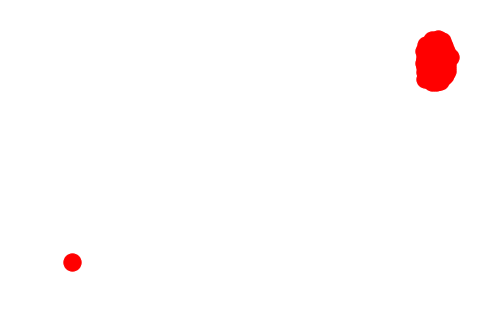

In [42]:
nx.draw(nx_graph)

In [43]:
pr_vector = np.array([1] * len(sim_mat))
#len(pr_vector)
damping = 0.85
min_dif = 1e-5
steps = 100
previous_pr = 0
for epoch in range(steps):
    pr_vector = (1-damping)+damping*np.matmul(sim_mat,pr_vector)
    if abs(previous_pr-sum(pr_vector))<min_dif:
        break
    else:
        previous_pr=sum(pr_vector)
        
print(pr_vector[:10])
print(scores)

[2.47805712e+187 2.63715572e+187 2.38270958e+187 2.92110043e+187
 2.27084864e+187 2.50659679e+187 2.62607825e+187 2.54041717e+187
 2.66891588e+187 2.55053573e+187]
{0: 0.008072651865276066, 1: 0.008501993259365037, 2: 0.0078119318398216, 3: 0.009293791260564146, 4: 0.007500319295916385, 5: 0.008146814785247897, 6: 0.008477413381565426, 7: 0.008251000819455925, 8: 0.008596957762357726, 9: 0.008257144250233068, 10: 0.0012695751770095795, 11: 0.008860552409260931, 12: 0.00808354331891815, 13: 0.008156804650453691, 14: 0.008443316877797879, 15: 0.008556893043719335, 16: 0.007812826653904838, 17: 0.008071958049751223, 18: 0.008406020961271342, 19: 0.0088478922486596, 20: 0.008860865186249187, 21: 0.007421917083656914, 22: 0.008223434004980818, 23: 0.008991766451813816, 24: 0.00846397039711992, 25: 0.006701898152599973, 26: 0.008232471647417278, 27: 0.008913135600535109, 28: 0.009061682997321345, 29: 0.009093905696447463, 30: 0.00924452161472398, 31: 0.008994323963323616, 32: 0.0072368691033

In [44]:
#119  total scores
max_score=max(scores.values()) #0.009293791260564146
min_score=min(scores.values()) #0.0012695751770095795 
for i,j in scores.items():
    if (j == min(scores.values()) ):
        print('Sentence',i,'has lowest rank;',min_score) # 3:0.009293791260564146 sentence 3 has highest ranking among all 119 sentences
    if (j == max(scores.values()) ):
        print('Sentence',i,'has highest rank;',max_score)

Sentence 3 has highest rank; 0.009293791260564146
Sentence 10 has lowest rank; 0.0012695751770095795


In [45]:
#sorted(scores.values(),reverse=True) #sort values of scores dict in desc order

In [46]:
#Summary Extraction)#Finally, it’s time to extract the top N sentences based on their rankings for summary generation.

ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
ranked_sentences[1]

(0.009260614592351134,
 'Major players feel that a big event in late November combined with one in January before the Australian Open will mean too much tennis and too little rest.')

In [47]:
# Extract top 10 sentences as the summary
for i in range(10):
  print(ranked_sentences[i])

(0.009293791260564146, "When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.")
(0.009260614592351134, 'Major players feel that a big event in late November combined with one in January before the Australian Open will mean too much tennis and too little rest.')
(0.00924452161472398, 'Speaking at the Swiss Indoors tournament where he will play in Sundays final against Romanian qualifier Marius Copil, the world number three said that given the impossibly short time frame to make a decision, he opted out of any commitment.')
(0.009213900380764764, '"I felt like the best weeks that I had to get to know players when I was playing were the Fed Cup weeks or the Olympic weeks, not necessarily during the tournaments.')
(0.00920358812889656,

In [48]:
ranked_sentences[118]

(0.0012695751770095795, "'No, not at all.")